In [32]:
# import the necessary packages
from os import listdir
from os.path import isfile, join
from skimage.metrics import normalized_root_mse as compare_nrmse
from skimage.metrics import structural_similarity as ssim
from sys import argv, exit, stderr
from os.path import dirname
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [85]:
file_root = 'FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220503163150'
start = 85
bg_file = f'./jpgs/{file_root}/frame000000.jpg'
file_0 = f'./jpgs/{file_root}/frame{start:06d}.jpg'
file_1 = f'./jpgs/{file_root}/frame{start+1:06d}.jpg'
file_2 = f'./jpgs/{file_root}/frame{start+2:06d}.jpg'

gray_0 = cv2.imread(file_0, 0)
gray_1 = cv2.imread(file_1, 0)
gray_2 = cv2.imread(file_2, 0)
gray_bg = cv2.imread(bg_file, 0)

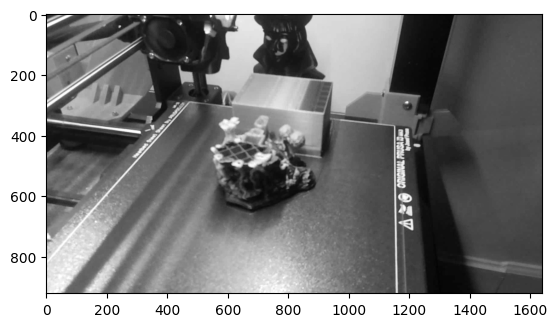

In [82]:
plt.imshow(gray_1, cmap='gray')
plt.show()

In [83]:
diff_1 = cv2.absdiff(gray_1, gray_bg)
thresh_1 = cv2.threshold(diff_1, 20, 255, cv2.THRESH_BINARY)[1]
diff_2 = cv2.absdiff(gray_2, gray_bg)
thresh_2 = cv2.threshold(diff_2, 20, 255, cv2.THRESH_BINARY)[1]

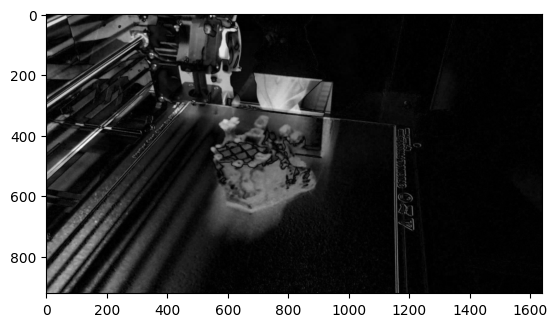

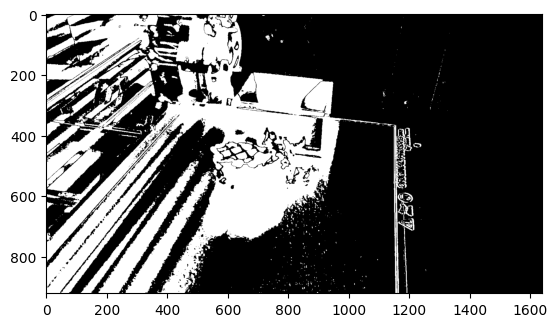

In [84]:
plt.imshow(diff_1, cmap='gray')
plt.show()
plt.imshow(thresh_1, cmap='gray')
plt.show()

In [76]:
(score, ssim_result) = ssim(gray_1, gray_0, data_range=gray_1.max() - gray_1.min(), full=True)
score

0.9682718908525884

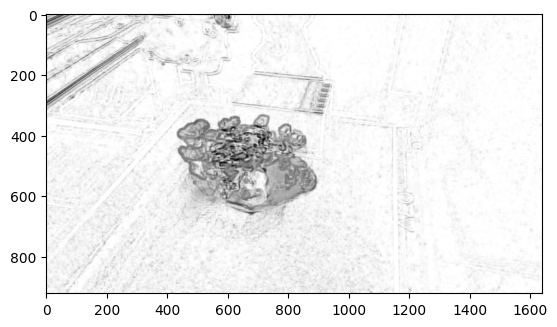

In [73]:
plt.imshow(ssim_result, cmap='gray')
plt.show()

In [45]:
def do_ssim_on_folder(file_root):
    onlyfiles = [f for f in listdir(f'./jpgs/{file_root}/') if isfile(join(f'./jpgs/{file_root}/', f))]

    ssims = []
    for i in range(len(onlyfiles)-1):
        file_0 = f'./jpgs/{file_root}/frame{i:06d}.jpg'
        file_1 = f'./jpgs/{file_root}/frame{i+1:06d}.jpg'

        gray_0 = cv2.imread(file_0, 0)
        gray_1 = cv2.imread(file_1, 0)

        ssims.append(ssim(gray_1, gray_0, data_range=gray_1.max() - gray_1.min()))
        
    df = pd.DataFrame({'x': ssims})
    df.plot()
    plt.show()
    return df

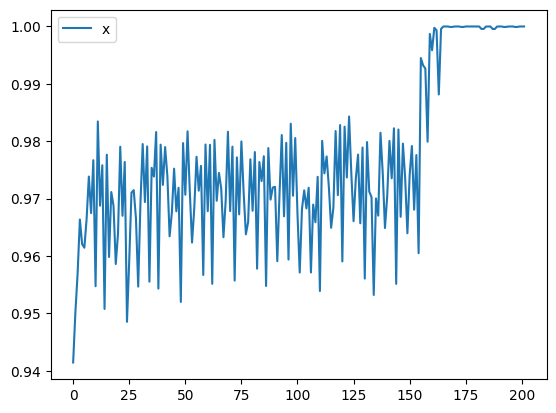

In [46]:
# Part breaking off starting #145. Then minor spaghetti run-offs

df = do_ssim_on_folder('FAILED_Fab365_Foldable_Marvin_0.1mm_PLA_MK3SMMU2S_12h47m_20220906132658')

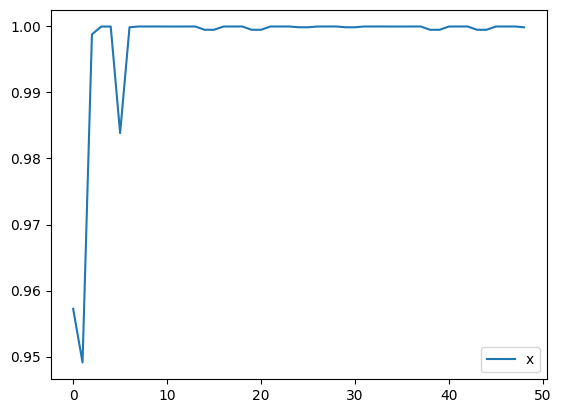

In [47]:
# Seeminly big change on frame #001 but ssim is 0.95. Frame #005 was 0.98 probably due to a tiny bed shift

df = do_ssim_on_folder('FAILED_FR_Mount_0.2mm_PLA_MK3SMMU2S_6h28m_20220827030911')

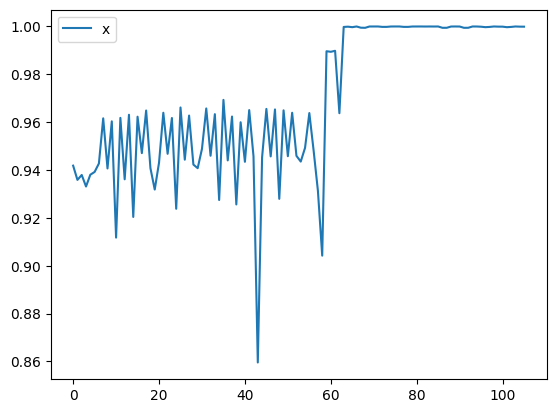

In [49]:
# Frame #043 due to bed shifting. #57 is a good detection

df = do_ssim_on_folder('FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240')

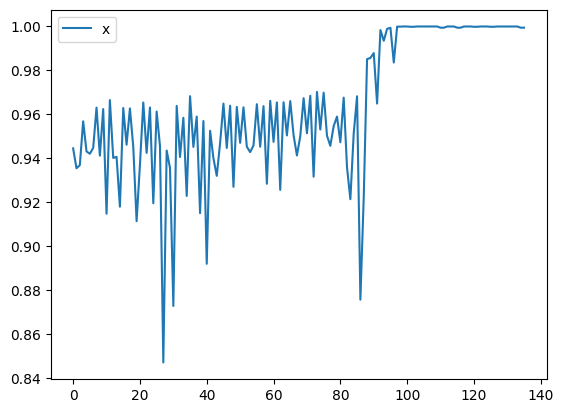

In [51]:
# Frame #027 and #030 due to bed shifting. #86 is a good detection

df = do_ssim_on_folder('FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220503163150')

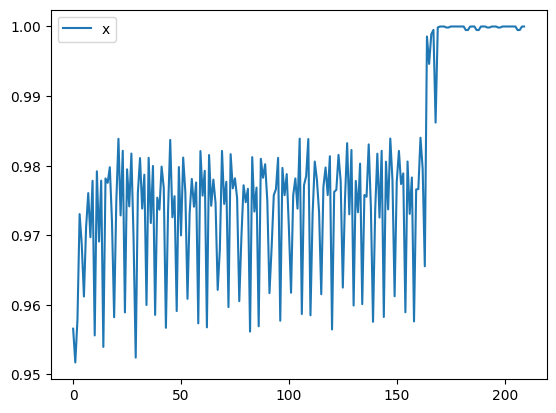

In [53]:
# Frame #017 - filament runs out. But no obvious change until gantry stopped moving, which probably means gantry moving is a major noise driver

df = do_ssim_on_folder('FAILED_UMesh_BAO_dumpling_god_v5_0.1mm_PLA_MK3SMMU2S_5h4m_20220910160913')

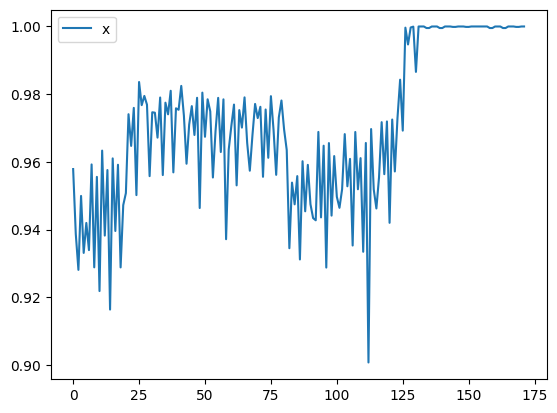

In [54]:
# Before frame #017 - larger areas are being printed hence ssim is lower. Not sure why ssim went lower after #080.
# Frame #112 - light was turned on

df = do_ssim_on_folder('FR_Mount_0.2mm_PLA_MK3SMMU2S_6h28m_20220830012149')

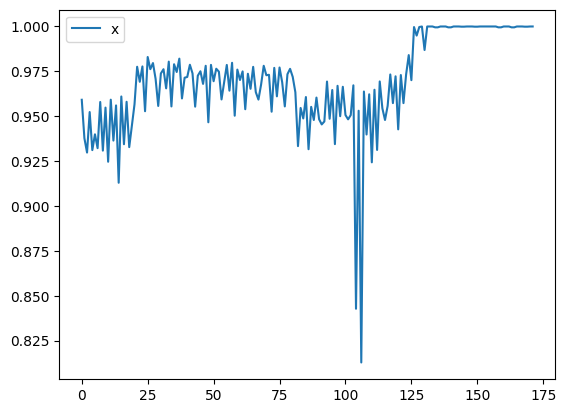

In [55]:
# Frame #104 - light was turned on. Note how similar the chart is to the previous one, which was the same model but different print.

df = do_ssim_on_folder('FR_Mount_0.2mm_PLA_MK3SMMU2S_6h28m_20220831202709')

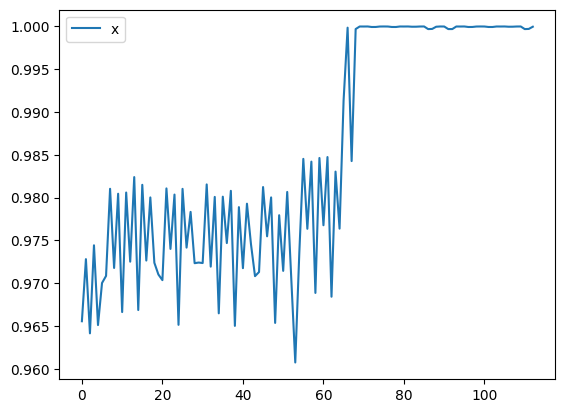

In [57]:
# Frame #053 - slight lighting change for unknown reason.

df = do_ssim_on_folder('Merged_0.15mm_PLA_MK3SMMU2S_1h8m_20220324025925')

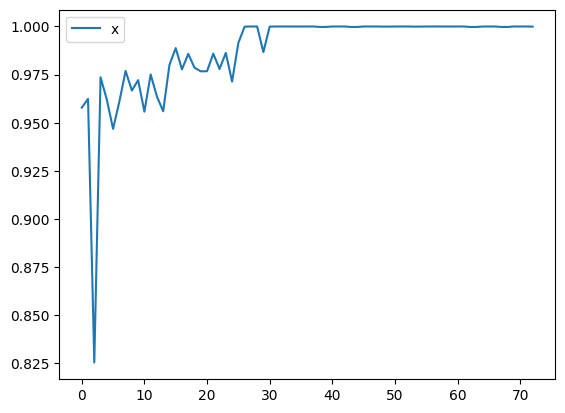

In [60]:
# Frame #002 bed shifting caused much bigger change than seen in #000 and #001

df = do_ssim_on_folder('multi_material_test_2_0.15mm_PLA_MK3SMMU2S_5h16m_20220322043743')

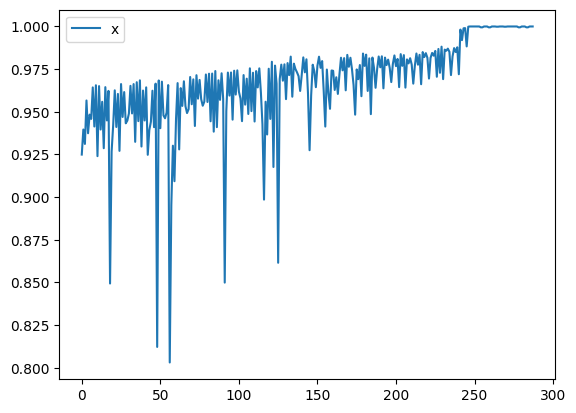

In [62]:
# Frame #018, #048, #056, #091, #122 bed shifted. 

df = do_ssim_on_folder('newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220509072520')

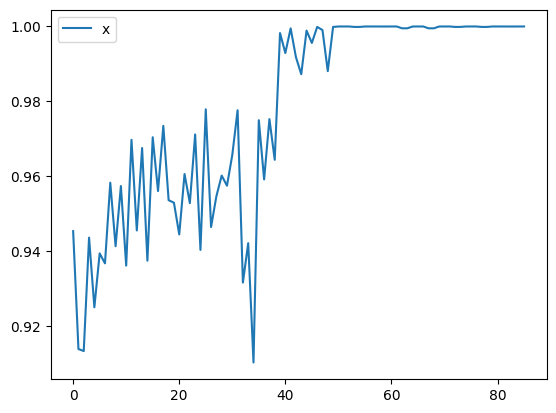

In [67]:
# frame #032 - #035 Some lights were turned on/off

df = do_ssim_on_folder('Pixel_6_Pro_Case_with_kickstand_0.2mm_PLA_MK3SMMU2S_2h4m_20220629161032')

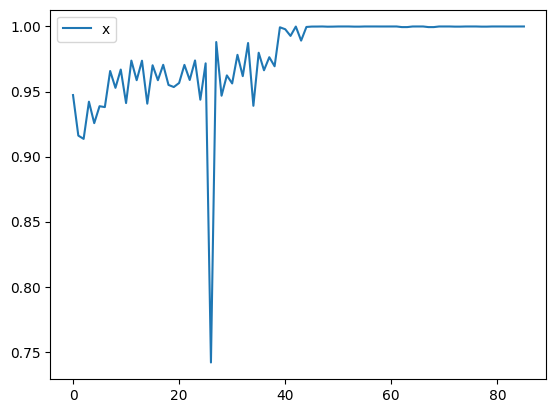

In [68]:
# Before frame #026 - bed shifted

df = do_ssim_on_folder('Pixel_6_Pro_Case_with_kickstand_0.2mm_PLA_MK3SMMU2S_2h6m_20220629185935')

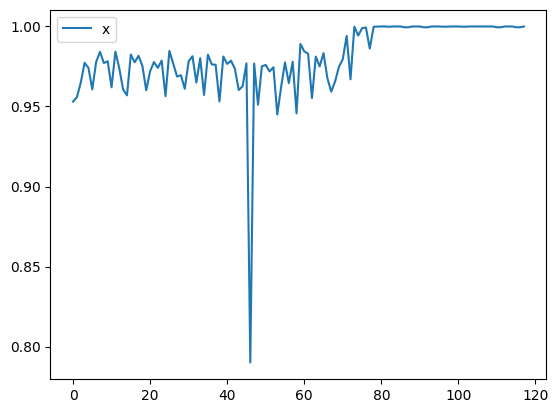

In [71]:
# Before frame #046 - bed shifted

df = do_ssim_on_folder('Spotify_0.1mm_PLA_MK3SMMU2S_3h20m_20220825055943')

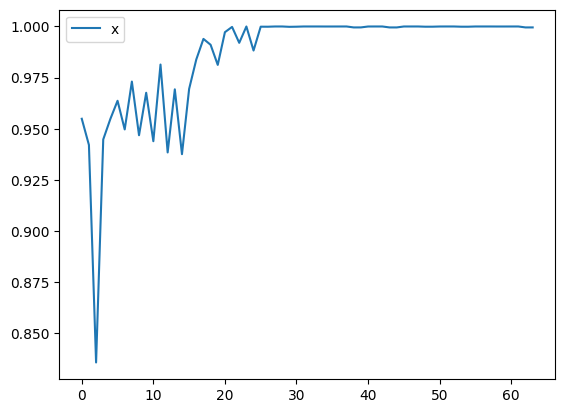

In [72]:
# Before frame #002: light turned off costed much larger change than seen in #001 and #000

df = do_ssim_on_folder('Spotify_Logo_0.2mm_PLA_MK3SMMU2S_1h9m_20220823221718')

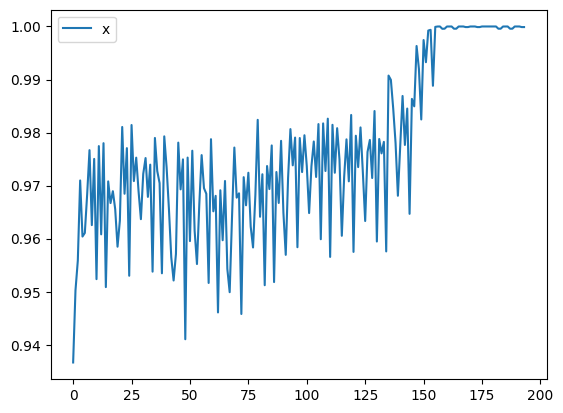

In [74]:
# Frame #048: filament color change.

df = do_ssim_on_folder('UMesh_PM3D_Sphere3D6_0.1mm_PLA_MK3SMMU2S_12h23m_20220910101333')

In [76]:
with pd.option_context('display.max_rows', None,):
    print(df)

            x
0    0.936655
1    0.950242
2    0.955861
3    0.970968
4    0.960397
5    0.961073
6    0.968337
7    0.976685
8    0.962551
9    0.975035
10   0.952366
11   0.977449
12   0.960813
13   0.977997
14   0.950863
15   0.970796
16   0.966708
17   0.968943
18   0.965564
19   0.958481
20   0.963408
21   0.981053
22   0.968464
23   0.977064
24   0.953006
25   0.981422
26   0.970853
27   0.975269
28   0.968933
29   0.963671
30   0.972209
31   0.975195
32   0.967873
33   0.973951
34   0.953778
35   0.978983
36   0.972748
37   0.970473
38   0.953469
39   0.979286
40   0.973475
41   0.965585
42   0.956468
43   0.952110
44   0.957109
45   0.978104
46   0.969292
47   0.974945
48   0.941037
49   0.975281
50   0.959539
51   0.976577
52   0.961485
53   0.955214
54   0.966479
55   0.975751
56   0.969520
57   0.968463
58   0.951647
59   0.978751
60   0.965154
61   0.968071
62   0.946089
63   0.969121
64   0.959700
65   0.970873
66   0.954289
67   0.949906
68   0.964029
69   0.977174
70   0